In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme()

#  Load dataset
df = pd.read_csv("IMDB Dataset.csv") 

print("Shape:", df.shape)
print(df.head())
print(df.info())

Shape: (50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [ ]:
#Preprocessing: Check missing values
print(df.isnull().sum())

# Drop duplicate
before = df.shape[0]
df = df.drop_duplicates(subset=["review"])
after = df.shape[0]
print(f"Removed {before - after} duplicate rows")


df["review_length"] = df["review"].str.len()
df["clean_review"] = df["review"].str.lower()

df[["review", "sentiment", "review_length"]].head()


review       0
sentiment    0
dtype: int64
Removed 418 duplicate rows


,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


sentiment
positive    24884
negative    24698
Name: count, dtype: int64
sentiment
positive    50.187568
negative    49.812432
Name: proportion, dtype: float64


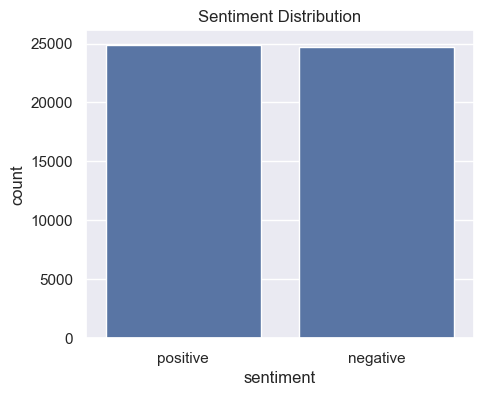

In [ ]:
#EDA: Sentiment distribution
print(df["sentiment"].value_counts())
print(df["sentiment"].value_counts(normalize=True) * 100)

plt.figure(figsize=(5,4))
sns.countplot(x="sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

count    49582.000000
mean      1310.568230
std        990.762238
min         32.000000
25%        699.000000
50%        971.000000
75%       1592.000000
max      13704.000000
Name: review_length, dtype: float64


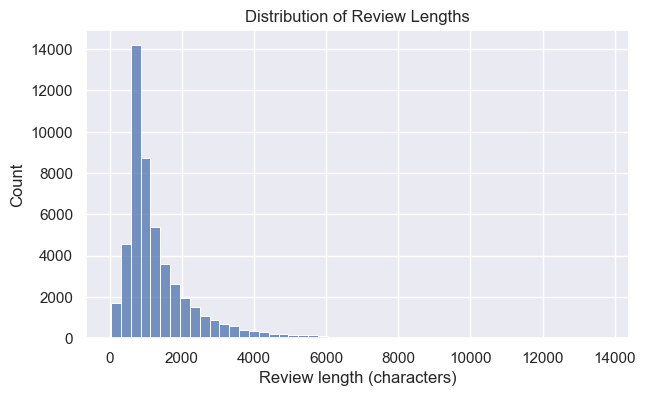

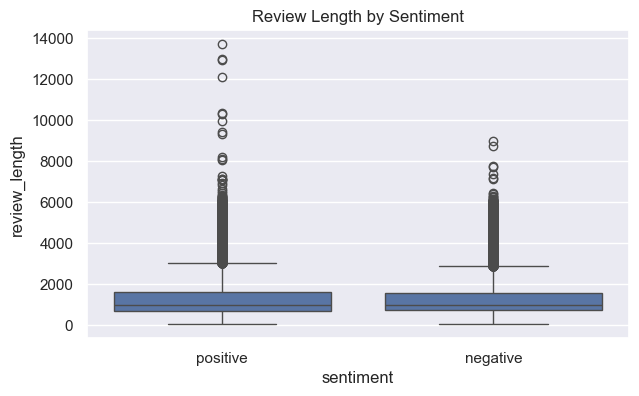

Example positive review:

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ

Example negative review:

Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And 

In [ ]:
#EDA: Review length statistics
print(df["review_length"].describe())

plt.figure(figsize=(7,4))
sns.histplot(df["review_length"], bins=50)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review length (characters)")
plt.ylabel("Count")
plt.show()

#Compare lengths
plt.figure(figsize=(7,4))
sns.boxplot(x="sentiment", y="review_length", data=df)
plt.title("Review Length by Sentiment")
plt.show()

#sample reviews
print("Example positive review:\n")
print(df[df["sentiment"] == "positive"]["review"].iloc[0][:500])

print("\nExample negative review:\n")
print(df[df["sentiment"] == "negative"]["review"].iloc[0][:500])
